In [ ]:
# default_exp gbe.baseline_drinking.separate

# Baseline drinking (separate modelling)

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%reload_ext rpy2.ipython
import seaborn as sns
from matplotlib import pyplot as plt
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", font_scale = 1.3, rc=custom_params)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#export
%load_ext autoreload
%autoreload 2
from trr265.gbe.ist.data_provider import ISTDataProvider
from trr265.gbe.wm.data_provider import WMDataProvider
from trr265.gbe.sst.data_provider import SSTDataProvider
from trr265.gbe.rtt.data_provider import RTTDataProvider

import trr265.gbe.ist.scoring as ist_scoring 
import trr265.gbe.wm.scoring as wm_scoring 
import trr265.gbe.sst.scoring as sst_scoring 
import trr265.gbe.rtt.scoring as rtt_scoring 

import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the data
In this notebook, all tests and examples are run on the initial baseline dataset.

### Information sampling task

In [ ]:
# Getting raw data
dp = ISTDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_ist_data(update = True)
# Adding data from redcap
df = df.merge(dp.get_gbe_data(update = True, columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
df = df.query("is_initial and is_baseline")
ist = ist_scoring.get_oversampling_predicted_joint(df)[0]
ist = ist.merge(dp.get_gbe_data(columns = ['participant']), left_on = 'gbe_index', right_index = True, how = 'left')
ist = ist.groupby('participant').mean()
ist.columns = ['ist_oversampling']

Preparing ist_data
Preparing gbe_data
0.0
0.0
202 participants had unplanned sessions.  423 sessions (9.72%) were removed.
0.0


### Working memory task

In [ ]:
# Getting raw data
dp = WMDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_wm_data(update = True)
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
df = df.query("is_initial and is_baseline")
# Filtering participants with old app
df = dp.filter_old_app_sessions(df)
df = dp.filter_level_two_failures(df)
wm = wm_scoring.get_perc_correct_predicted_sep_trial(df)[0]
wm = wm.merge(dp.get_gbe_data(columns = ['participant']), left_on = 'gbe_index', right_index = True, how = 'left')
wm = wm.groupby('participant').mean()
wm = wm.rename(columns={'perc_predicted_sep_trial_no_distractor_1': 'wm_no_1',
                       'perc_predicted_sep_trial_no_distractor_2': 'wm_no_2',
                       'perc_predicted_sep_trial_encoding_distractor': 'wm_encoding',
                       'perc_predicted_sep_trial_delayed_distractor':'wm_delayed'})

Preparing wm_data
8 participants used an old version of the task in some of their sessions.  13 sessions (2.48%) were removed from the dataset.
6 sessions (1.17%) were removed because participants failed a level two trial.


### Risk taking task

In [ ]:
# Getting raw data
dp = RTTDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_rtt_data(update = True)
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
df = df.query("is_initial and is_baseline")
rtt = rtt_scoring.get_perc_gamble_predicted_joint(df)[0]
rtt = rtt.merge(dp.get_gbe_data(columns = ['participant']), left_on = 'gbe_index', right_index = True, how = 'left')
rtt = rtt.groupby('participant').mean()
rtt = rtt.rename(columns={'perc_gamble_joint_win': 'rtt_win',
                       'perc_gamble_joint_loss': 'rtt_loss',
                       'perc_gamble_joint_mixed': 'rtt_mixed'})

Preparing rtt_data


### Stop signal task

In [ ]:
# Getting raw data
dp = SSTDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_sst_data(update = True)
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
df = df.query("is_initial and is_baseline")
sst = sst_scoring.get_ssrt_predicted_joint(df)[0]
sst = sst.merge(dp.get_gbe_data(columns = ['participant']), left_on = 'gbe_index', right_index = True, how = 'left')
sst = sst.groupby('participant').mean()
sst.columns = ['ssrt']

Preparing sst_data


### Drinking

In [ ]:
initial_participants = dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']).query("is_initial").participant.unique()
len(initial_participants)

300

### Standard drinks per day over last three month

#### Drinking days last three months

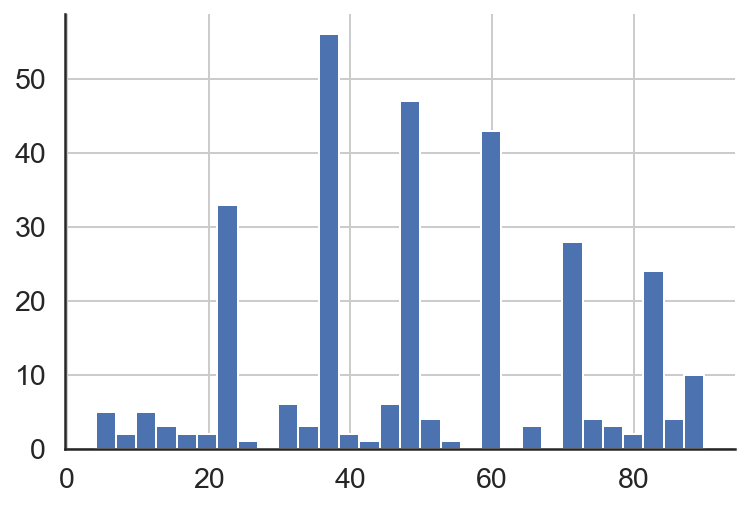

In [ ]:
standard_last_three = dp.get_baseline_drinking_data().loc[initial_participants]
standard_last_three.drinking_days_last_three_month.hist(bins = 30)
sns.despine()

#### Average standard drinks per drinking day

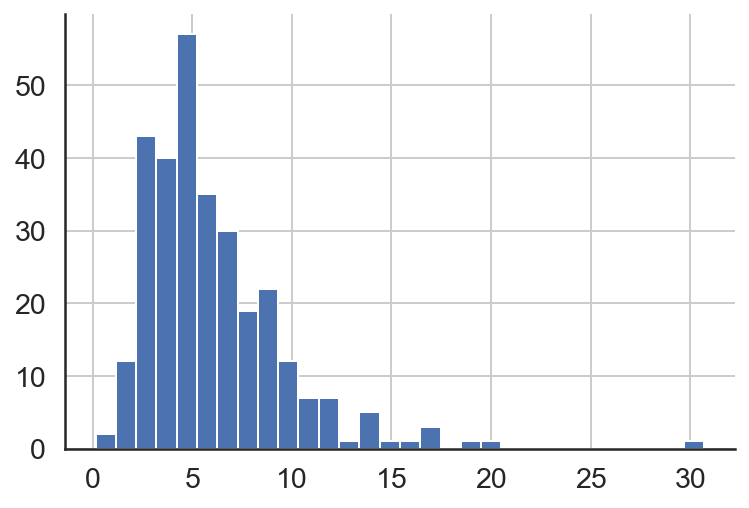

In [ ]:
standard_last_three = dp.get_baseline_drinking_data().loc[initial_participants]
standard_last_three.drinks_per_drinking_day_last_three_month.hist(bins = 30)
sns.despine()

> Note that the participants with 30 standard drinks per drinking day reported to drink 7 large beers and a bottle liquor (500ml of >30%) on every drinking day. For a person weighing over 45kg, this is still below the lethal dose of 8g/kg.

#### Average standard drinks per day

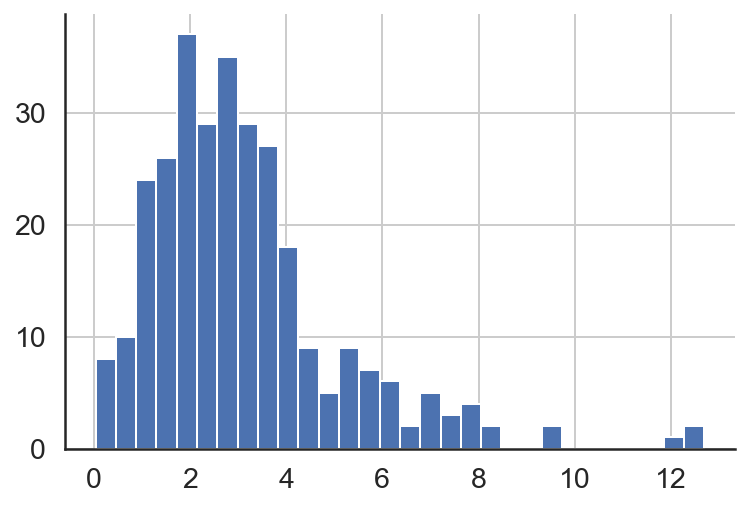

In [ ]:
standard_last_three = dp.get_baseline_drinking_data().loc[initial_participants]
standard_last_three.last_three_month.hist(bins = 30)
sns.despine()

### AUD criteria

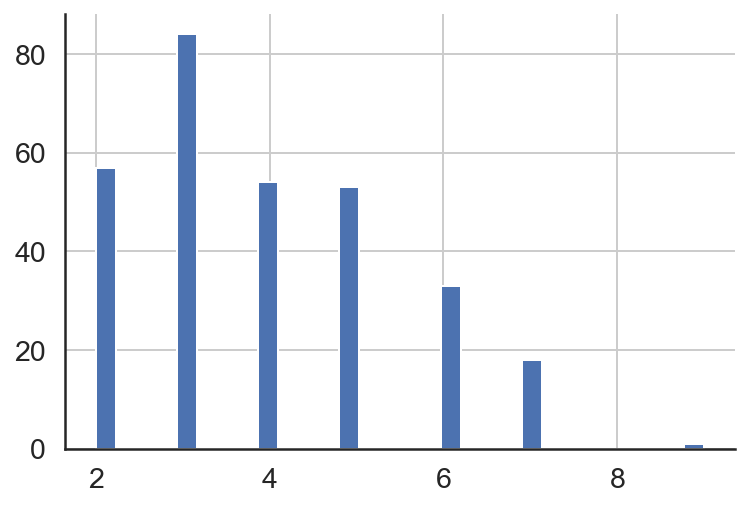

In [ ]:
ba = dp.get_ba_data(columns = ['redcap_event_name','mov_id','bx_aud_sum']).query("redcap_event_name=='erhebungszeitpunkt_arm_1'")
ba = ba[ba.mov_id.isin(initial_participants)]
aud = ba[~ba.bx_aud_sum.isnull()][['mov_id','bx_aud_sum']]
aud.columns = ['participant','aud']
aud = aud.groupby('participant').first()
aud.aud.hist(bins = 30)
sns.despine()

### Drinking days
16 participants did not report to drink any alcohol during the first EMA month.

In [ ]:
two_day = dp.get_two_day_data()
drinking_days = two_day.query("sampling_day<30")#.groupby('participant').g_alc.agg(['mean','median'])
drinking_days['drinking_days'] = ema_drinking.g_alc>0
drinking_days = drinking_days.groupby('participant')[['g_alc','drinking_days']].sum().reset_index()
drinking_days = drinking_days[drinking_days.participant.isin(initial_participants)].set_index('participant')

#### Drinking days

<AxesSubplot:>

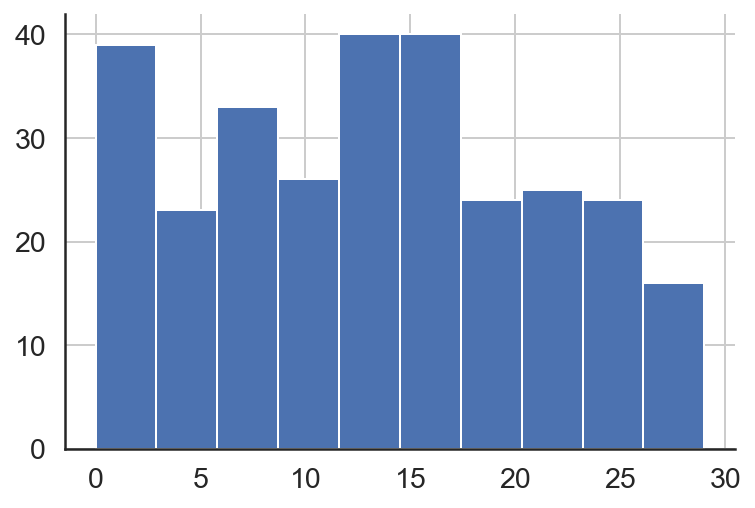

In [ ]:
drinking_days.drinking_days.hist()

#### Drinks per drinking day

<AxesSubplot:>

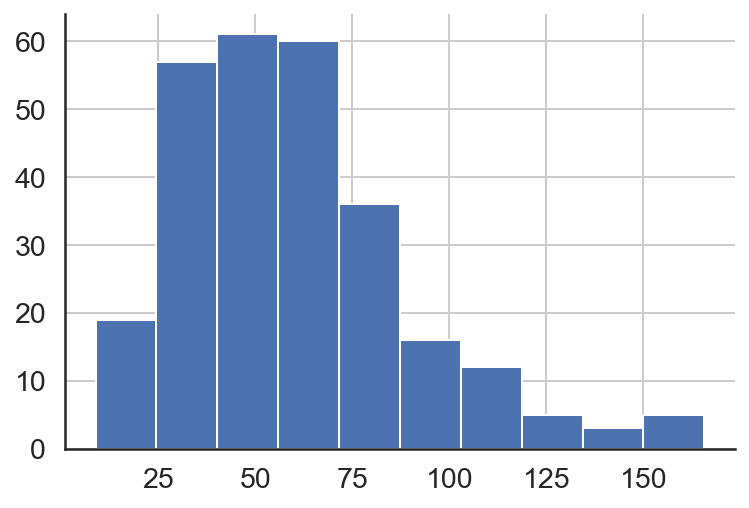

In [ ]:
drinking_days['g_alc_per_drinking_day'] = drinking_days.g_alc / drinking_days.drinking_days
drinking_days.g_alc_per_drinking_day.hist()

In [ ]:
drinking_days.replace([np.inf, -np.inf], np.nan).isna().sum()

g_alc                      0
drinking_days              0
g_alc_per_drinking_day    16
dtype: int64

In [ ]:
drinking_days = drinking_days[['drinking_days','g_alc_per_drinking_day']]

### Average ema drinking first month

In [ ]:
two_day = dp.get_two_day_data()
average_ema = two_day.query("sampling_day<30").groupby('participant').g_alc.agg(['mean','median'])
average_ema.columns = ['mean_g_alc','median_g_alc']
average_ema = average_ema.reset_index()
average_ema = average_ema[average_ema.participant.isin(initial_participants)].set_index('participant')

<AxesSubplot:>

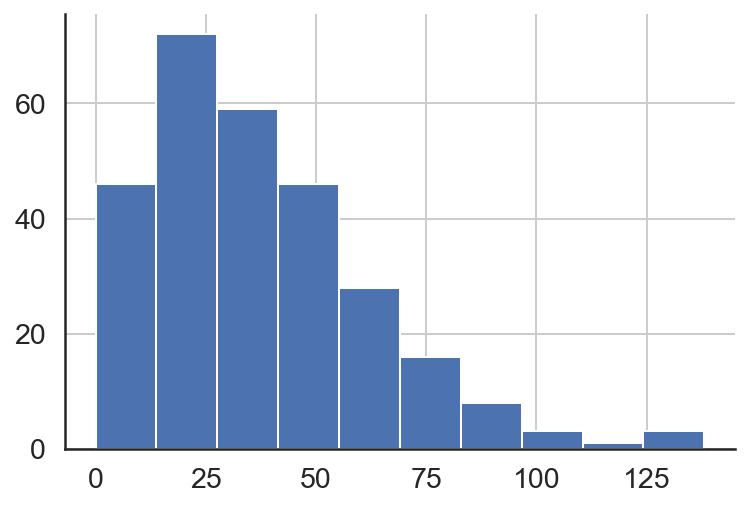

In [ ]:
average_ema.mean_g_alc.hist()

<AxesSubplot:>

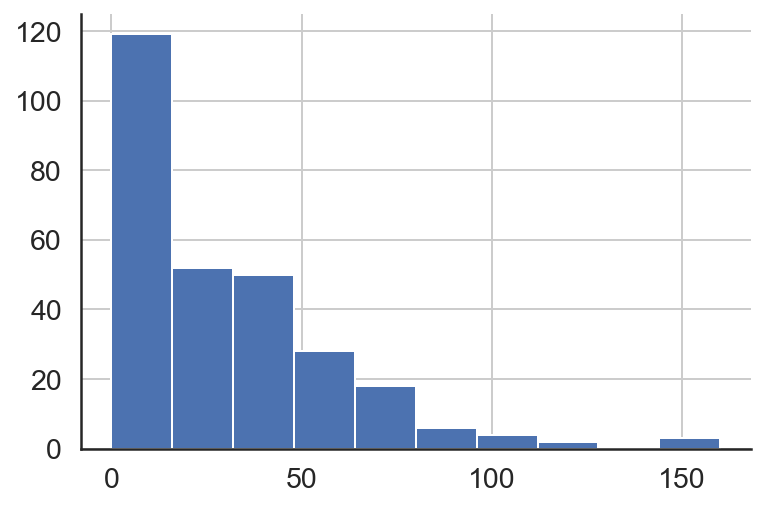

In [ ]:
average_ema.median_g_alc.hist()

### Merging

In [ ]:
standard_last_three['g_alc_per_drinking_day_last_three_month'] = standard_last_three.drinks_per_drinking_day_last_three_month * 12
standard_last_three['g_alc_per_day_last_three_month'] = standard_last_three.last_three_month * 12

In [ ]:
standard_last_three

,last_three_month,drinks_per_drinking_day_last_three_month,drinking_days_last_three_month,g_alc_per_drinking_day_last_three_month
participant,,,,
b001,0.800000,2.00,36.0,24.0
b002,1.860000,4.65,36.0,55.8
b012,2.880000,5.40,48.0,64.8
b013,6.300000,6.75,84.0,81.0
b015,2.426667,9.10,24.0,109.2
...,...,...,...,...
m199,3.000000,4.50,60.0,54.0
m202,2.720000,5.10,48.0,61.2
m205,6.160000,6.60,84.0,79.2


In [ ]:
drinking = pd.concat([standard_last_three[['g_alc_per_day_last_three_month','drinking_days_last_three_month','g_alc_per_drinking_day_last_three_month']], aud, average_ema, drinking_days],axis = 1)

In [ ]:
drinking

,g_alc_per_day_last_three_month,drinking_days_last_three_month,g_alc_per_drinking_day_last_three_month,aud,mean_g_alc,median_g_alc,drinking_days,g_alc_per_drinking_day
participant,,,,,,,,
b001,9.60,36.0,24.0,2.0,15.511111,6.40,5.0,27.920000
b002,22.32,36.0,55.8,3.0,4.966667,0.00,3.0,19.866667
b012,34.56,48.0,64.8,3.0,11.504348,0.00,8.0,33.075000
b013,75.60,84.0,81.0,2.0,33.600000,0.00,7.0,72.000000
b015,29.12,24.0,109.2,2.0,22.105263,0.00,3.0,140.000000
...,...,...,...,...,...,...,...,...
m199,36.00,60.0,54.0,7.0,125.580000,50.80,16.0,156.975000
m202,32.64,48.0,61.2,2.0,NaN,NaN,0.0,NaN
m205,73.92,84.0,79.2,3.0,93.155556,88.00,27.0,93.155556


## Correlations

In [ ]:
import numpy as np
import trr265.stats as stats
import scipy.stats


def correl(df, corr_func = scipy.stats.pearsonr):
    df_corr = pd.DataFrame() # Correlation matrix
    
    df_p = pd.DataFrame()  # Matrix of p-values
    for x in df.columns:
        for y in df.columns:
            corr = corr_func(df[x], df[y])
            df_corr.loc[x,y] = corr[0]
            df_p.loc[x,y] = corr[1]
    return df_corr, df_p

def correlation_matrix(analysis_data, alpha = .05, bonferroni = False, size = (11,9), show_correl = True, corr_func = scipy.stats.pearsonr):
    print(len(analysis_data))

    if bonferroni:
        variables = len(analysis_data.columns)
        correction = ((variables * variables) - variables)/2
        alpha = alpha / correction

    df_corr, df_p = correl(analysis_data, corr_func = corr_func)
    sig = (df_p < alpha).replace({True:"*",False:""})
    # Generate a mask for the upper triangle
    mask = np.zeros_like(df_corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=size)
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    df_corr_label = df_corr.applymap(lambda x: '%.2f'%x)
    df_corr_label = df_corr_label + sig
    if show_correl:
        p1 = sns.heatmap(df_corr, mask=mask,cmap=cmap, center=0, vmax=1, vmin=-1,
                    square=True, linewidths=.5, cbar_kws={"shrink": .5},
                   annot=df_corr_label,fmt = '')
    else:
         p1 = sns.heatmap(df_corr, mask=mask,cmap=cmap, center=0, vmax=1, vmin=-1,
                    square=True, linewidths=.5, cbar_kws={"shrink": .5},fmt = '')       
    p1.text(len(df_corr)-1, 1, "Alpha = %g"%alpha, size='medium', color='black')
    p = df_p.unstack()
    p.index = ['*'.join(map(str,i)) for i in p.index.tolist()]
    p = p.to_dict()
    corr = df_corr.unstack()
    corr.index = ['*'.join(map(str,i)) for i in corr.index.tolist()]
    corr = corr.to_dict()

### Drinking

In [ ]:
len(sst)

281

#### Pearson

274


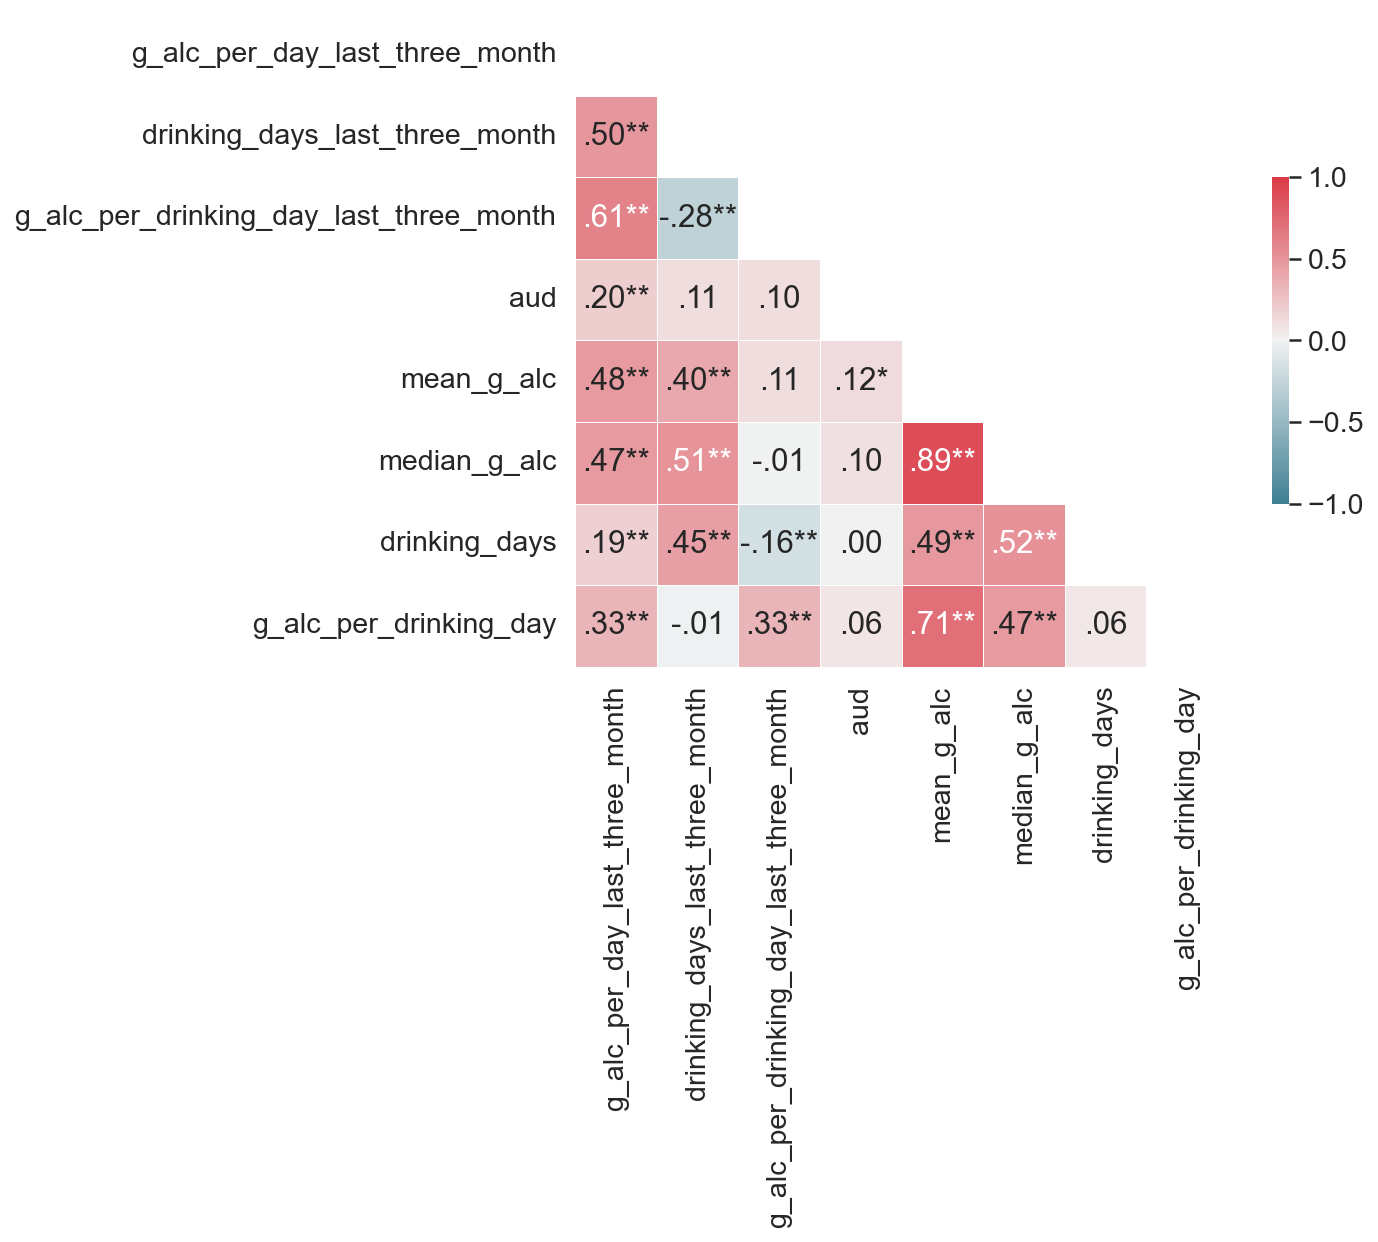

In [ ]:
correlation_matrix(drinking.dropna(), size = (8,6))

#### Spearman

274


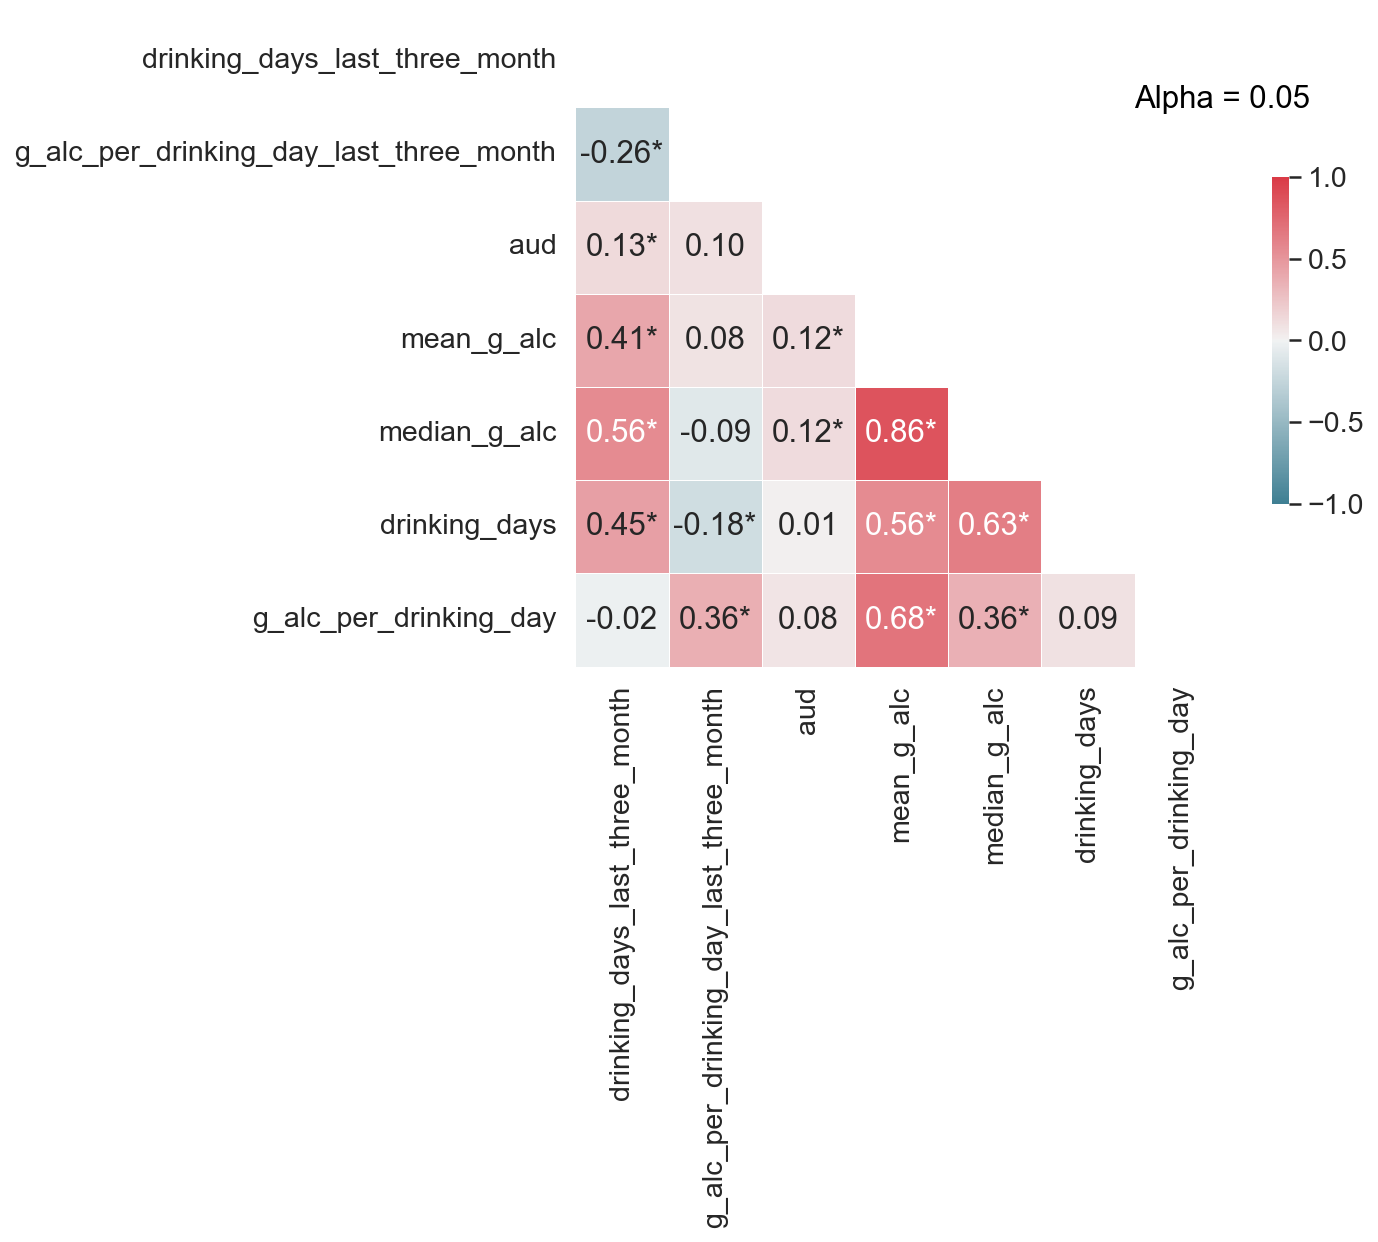

In [ ]:
correlation_matrix(drinking.dropna(), size = (8,6), corr_func = scipy.stats.spearmanr)

### Tasks

In [ ]:
tasks = pd.concat([wm, sst, rtt,ist],axis = 1)

#### Pearson

269


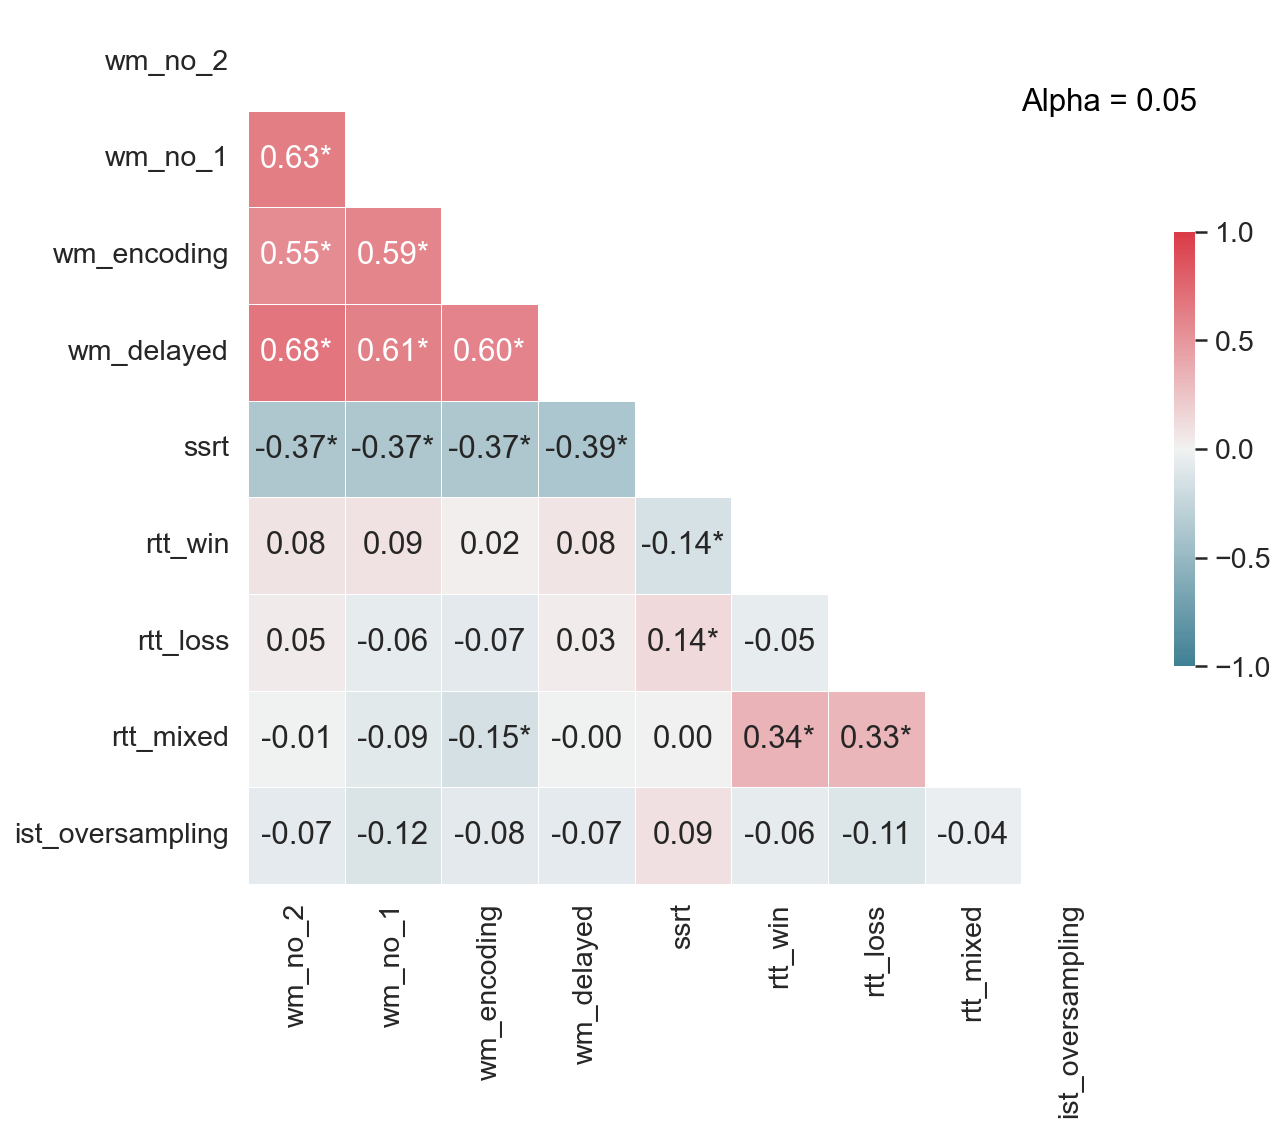

In [ ]:
correlation_matrix(tasks.dropna(), size = (10,8))

- Working memory scores correlate with each other.  
- RTT mixed correlates positvely with rtt win and rtt loss.
- SSRTs correlate negatively with working memory.  
- RTT win correlates positively with wm no distractor 1 and wm delayed and negatively with SSRTs.  
- RTT loss correlates positively with SSRTs.
- RTT mixed correlates negatively with wm encoding.
- Oversampling correlates negatively with rtt loss.

#### Spearman

269


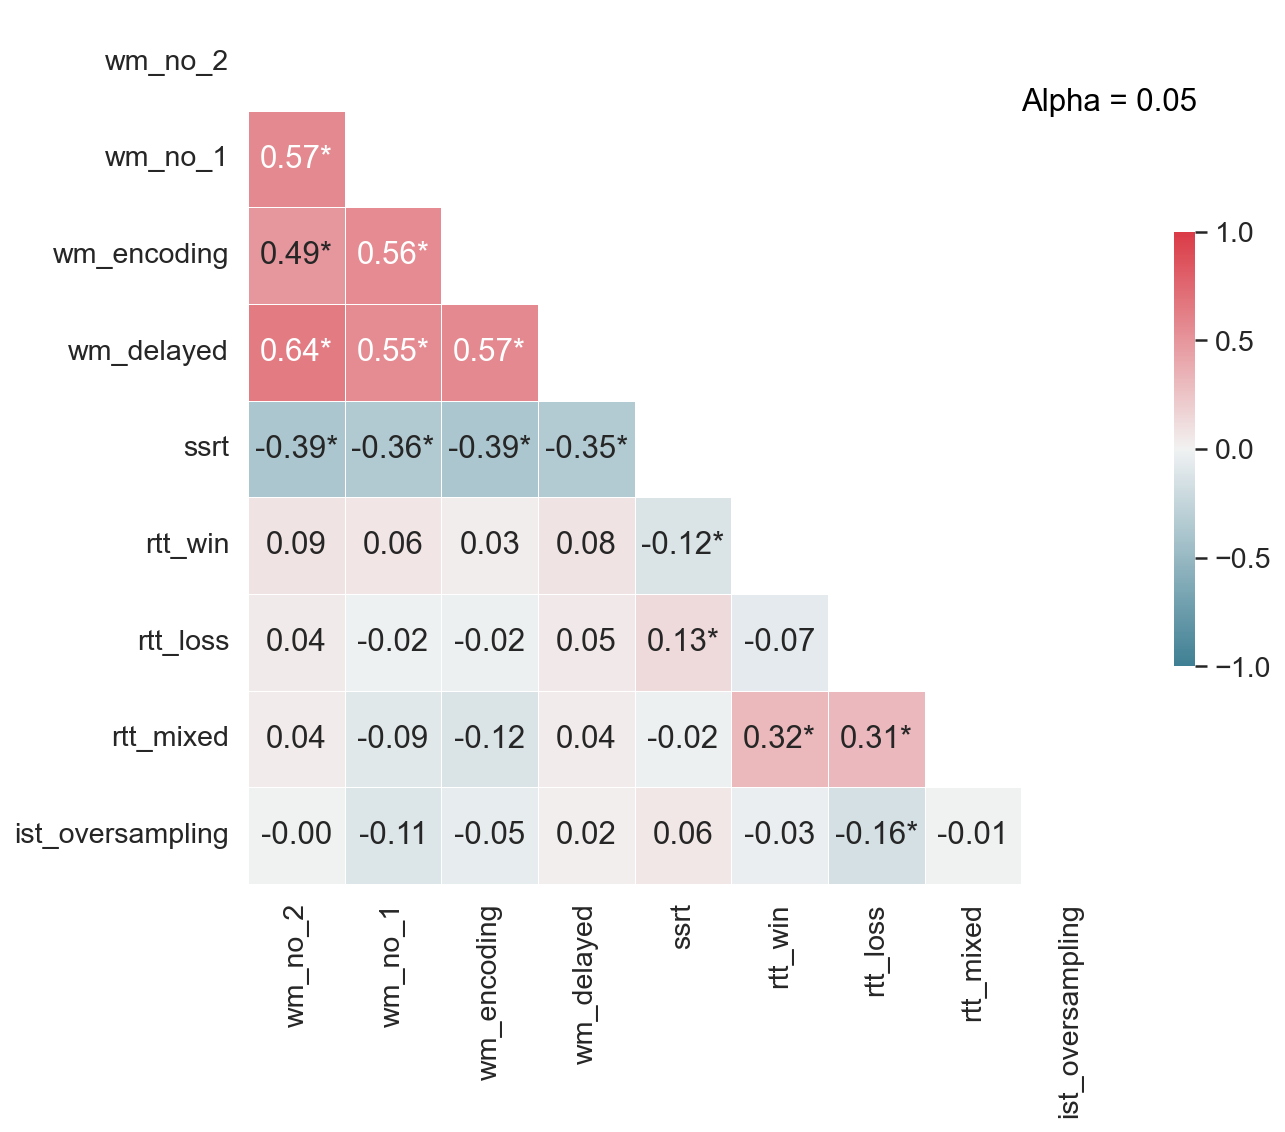

In [ ]:
correlation_matrix(tasks.dropna(), size = (10,8), corr_func = scipy.stats.spearmanr)

- Correlation between RTT win and wm delayed gone.
- Correlation RTT mixed correlates negatively with wm encoding gone.
- Oversampling now also negatively correlates with wm_no_1. 

### Together

#### Pearson

In [ ]:
def correlation_matrix(analysis_data, alpha = .05, bonferroni = False, size = (11,9), show_correl = True, corr_func = scipy.stats.pearsonr):
    print(len(analysis_data))

    if bonferroni:
        variables = len(analysis_data.columns)
        correction = ((variables * variables) - variables)/2
        alpha = alpha / correction

    df_corr, df_p = correl(analysis_data, corr_func = corr_func)
    
    #sig = (df_p < alpha).replace({True:"*",False:""})
    
    sig = df_p
    sig.where(sig>=.001).fillna(2)
    sig = sig.where(sig>=.01).fillna(3)
    sig = sig.where(sig>.05).fillna(4)
    sig = sig.where(sig>1).fillna(5)
    sig = sig.replace({2:"***"})
    sig = sig.replace({3:"**"})
    sig = sig.replace({4:"*"})
    sig = sig.replace({5:""})

    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(df_corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=size)
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    df_corr_label = df_corr.applymap(lambda x: ('%.2f'%x).replace('0.','.'))
    df_corr_label = df_corr_label + sig
    if show_correl:
        p1 = sns.heatmap(df_corr, mask=mask,cmap=cmap, center=0, vmax=1, vmin=-1,
                    square=True, linewidths=.5, cbar_kws={"shrink": .5},
                   annot=df_corr_label,fmt = '')
    else:
         p1 = sns.heatmap(df_corr, mask=mask,cmap=cmap, center=0, vmax=1, vmin=-1,
                    square=True, linewidths=.5, cbar_kws={"shrink": .5},fmt = '')       
    #p1.text(len(df_corr)-1, 1, "Alpha = %g"%alpha, size='medium', color='black')
    p = df_p.unstack()
    p.index = ['*'.join(map(str,i)) for i in p.index.tolist()]
    p = p.to_dict()
    corr = df_corr.unstack()
    corr.index = ['*'.join(map(str,i)) for i in corr.index.tolist()]
    corr = corr.to_dict()

250


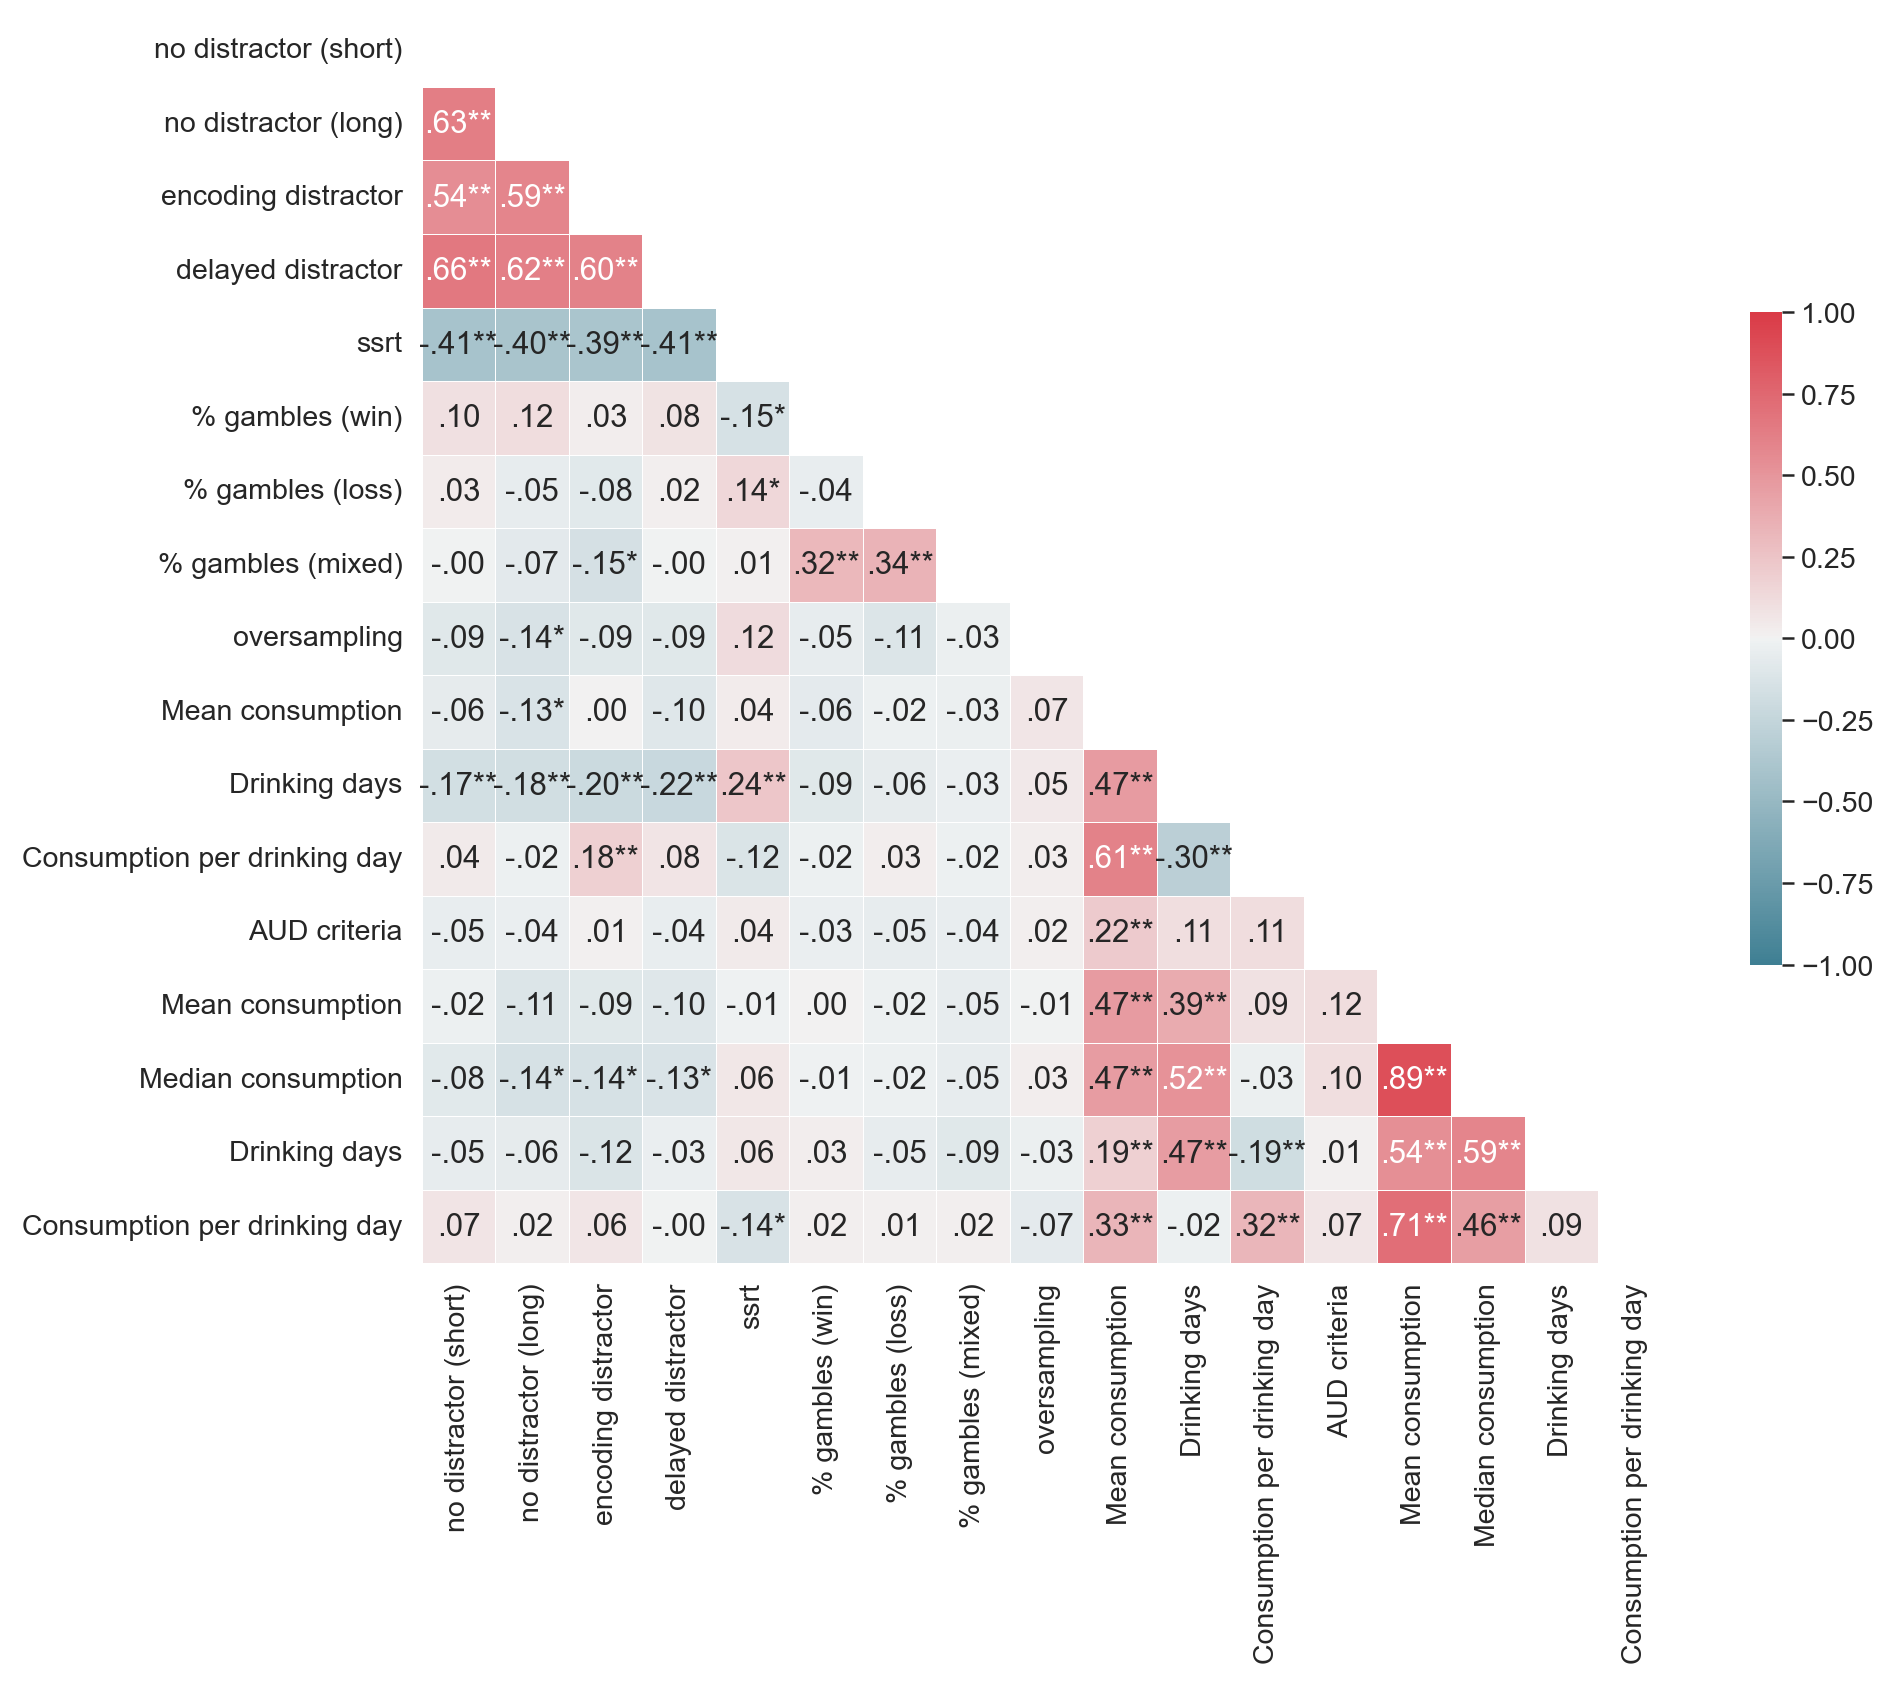

In [ ]:
tasks = pd.concat([wm, sst, rtt,ist],axis = 1)
corr_data = pd.concat([tasks, drinking],axis = 1).dropna()
labels = {
    "wm_no_1":"no distractor (long)",
    "wm_no_2":"no distractor (short)",
    "wm_encoding":"encoding distractor",
    "wm_delayed":"delayed distractor",
    "rtt_win":"% gambles (win)",
    "rtt_loss":"% gambles (loss)",
    "rtt_mixed":"% gambles (mixed)",
    "ist_oversampling":"oversampling",
    "last_three_month":"Drinks per day",
    "g_alc_per_day_last_three_month":"Mean consumption",
    "g_alc_per_drinking_day_last_three_month":"Consumption per drinking day",
    "drinking_days_last_three_month":"Drinking days",
    "aud":"AUD criteria",
    "mean_g_alc":" Mean consumption",
    "median_g_alc":"Median consumption",
    "drinking_days":" Drinking days",
    "g_alc_per_drinking_day":" Consumption per drinking day"
}
corr_data = corr_data.rename(columns = labels)    
#display(corr_data)

correlation_matrix(corr_data, size = (14,12))

#### Spearman

258


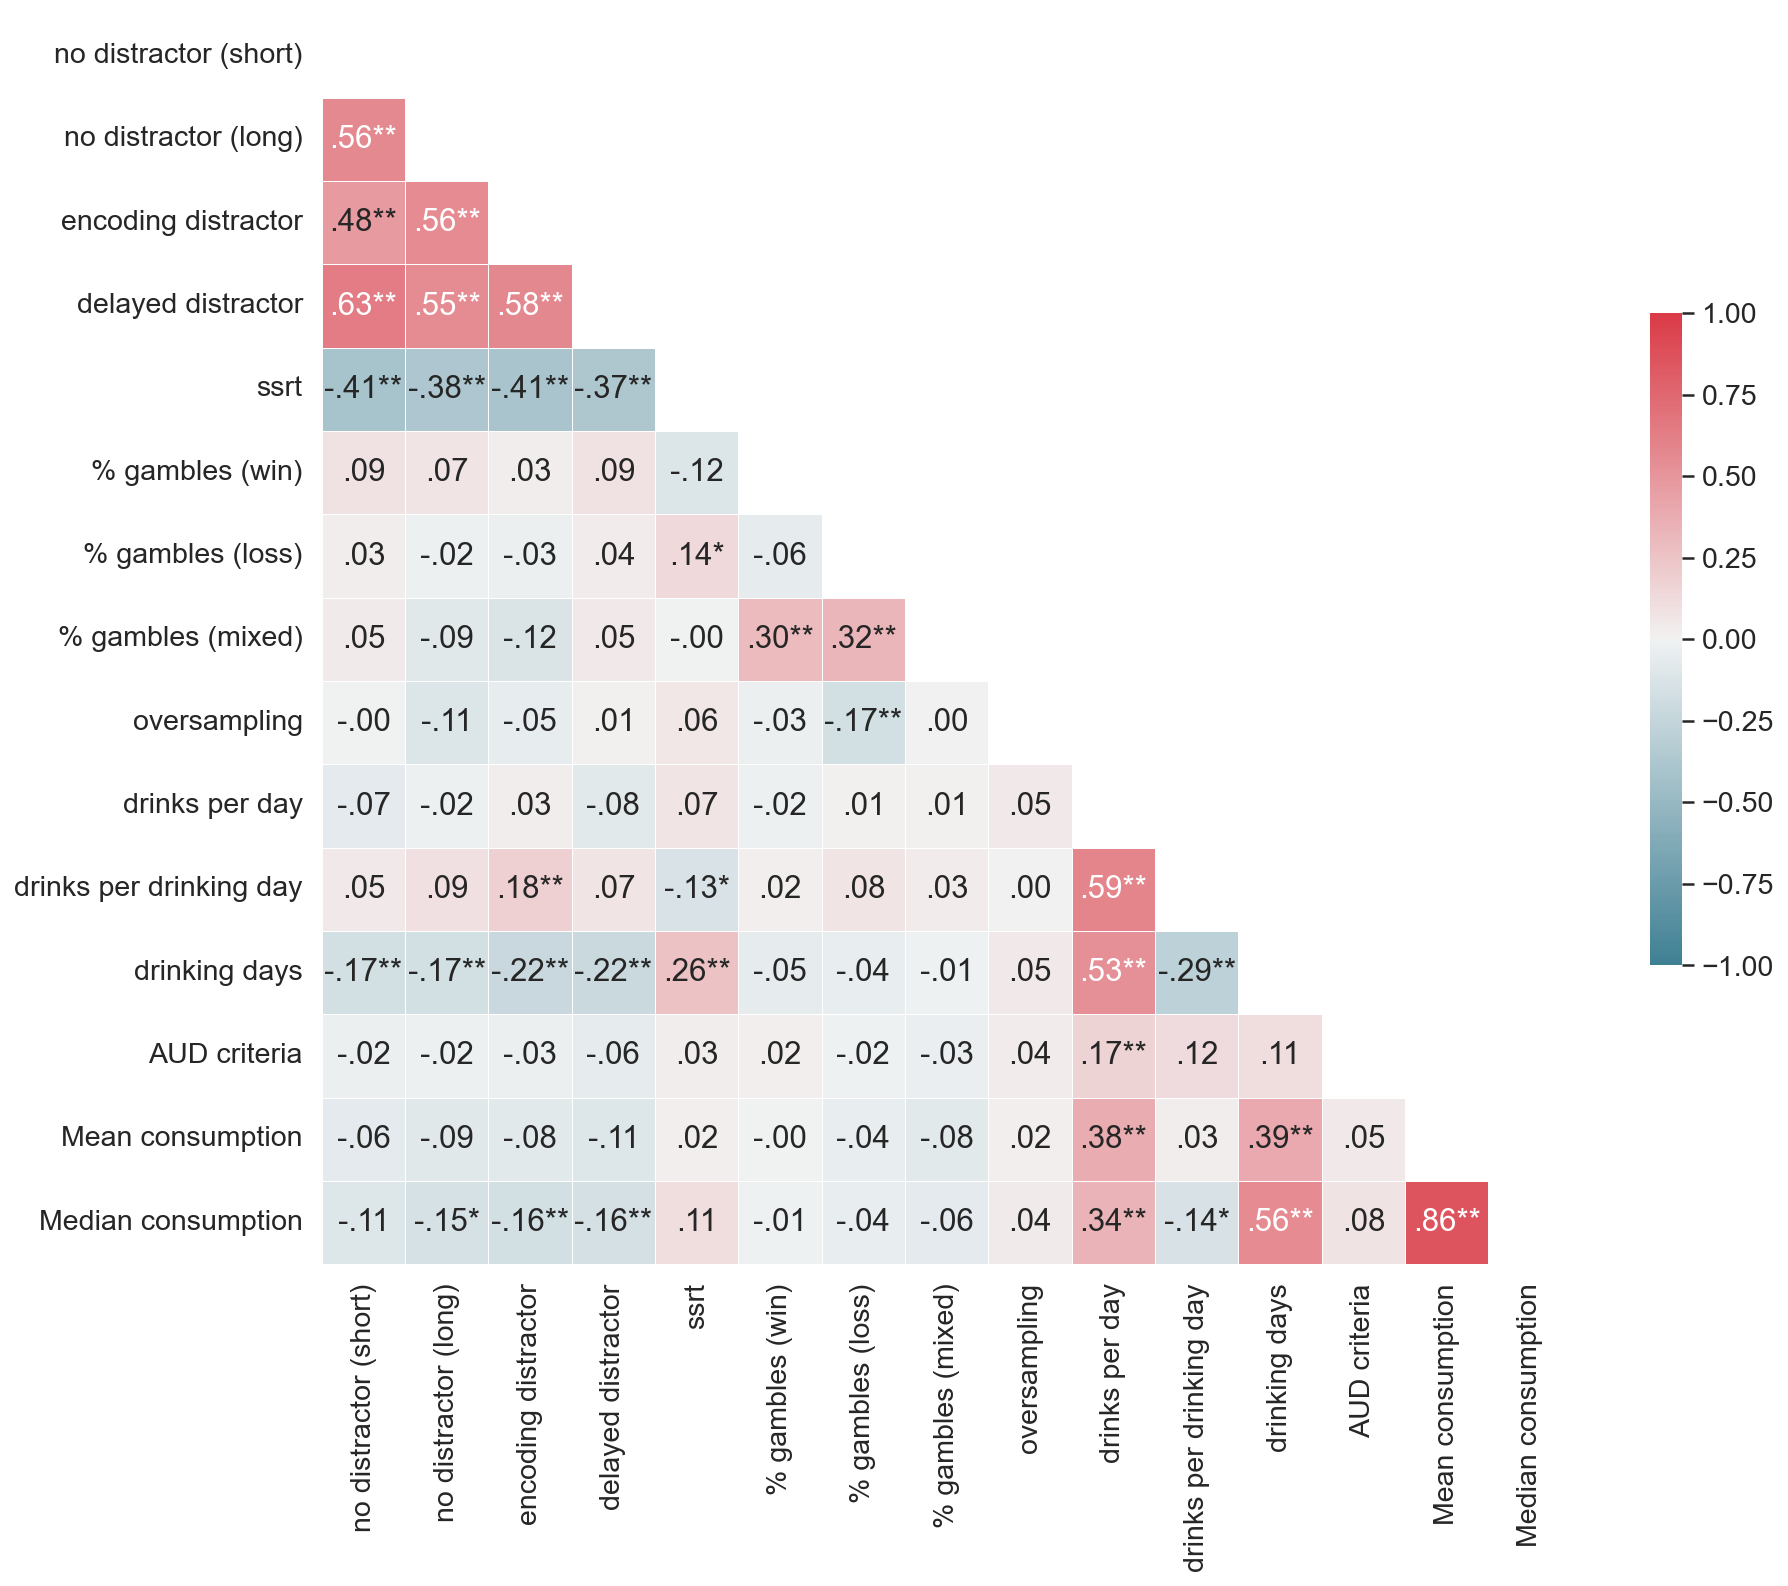

In [ ]:
correlation_matrix(corr_data, size = (14,12), corr_func = scipy.stats.spearmanr)

##### WM_encoding and last_three_month
Effect in the opposite direction as expected.

In [ ]:
sns.regplot(x = 'wm_encoding', y = 'last_three_month', data = all_data)

NameError: name 'all_data' is not defined

##### SSRT and last_three_month
Effect in the opposite direction as expected.

In [ ]:
sns.regplot(x = 'ssrt', y = 'last_three_month', data = all_data)

##### WM no distractor 1 and median ema drinking
Effect in the opposite direction as expected.

In [ ]:
sns.regplot(x = 'wm_no_1', y = 'median_g_alc', data = all_data)

##### WM encoding and median ema drinking
Effect in the opposite direction as expected.

In [ ]:
sns.regplot(x = 'wm_encoding', y = 'median_g_alc', data = all_data)

##### WM delayed and median ema drinking
Effect in the opposite direction as expected.

In [ ]:
all_data.wm_delayed.hist()

In [ ]:
sns.regplot(x = 'wm_delayed', y = 'median_g_alc', data = all_data)

In [ ]:
sns.regplot(x = 'ssrt', y = 'median_g_alc', data = all_data)

This would mean that on most days participants do not drink.

In [ ]:
two_day